# Assignment #2 - Classification

<font color="red"> <b> Due: Mar 5 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Atefeh Mahdavi </font>

# I. Introduction

In this assignment I describe the data and give an overview of classification algorithms (pocket algorithm, QDA, LDA, Logistic regression) and how they work. Then I implement them to do the experiments.
I will also go over the accuracy and performance measurments to compare different algorithms. 

# II. Data

This dataset is the insurance dataset from a company based in Singapore. The source of the data is Kaggle website and is tagged as binary classification. 
Ther are 11 attributes in this dataset and the target label is the claim status.
The costumer is if someone files a claim or not. 

### Reading data and preprocessing

In [ ]:
# libraries
from IPython.display import Math
import pandas as pd 
import json
import csv 
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as copy 
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [350]:
with open("travelinsurance.csv") as csvFile:
    csvReader = csv.DictReader(csvFile)
    data = [i for i in csvReader]
df = pd.DataFrame(data)
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,,37


In [202]:
print("Size of data= ", df.size)
print("Shape of data= ", df.shape)

Size of data=  163971
Shape of data=  (18219, 9)


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null object
Destination             63326 non-null object
Net Sales               63326 non-null object
Commision (in value)    63326 non-null object
Gender                  63326 non-null object
Age                     63326 non-null object
dtypes: object(11)
memory usage: 5.3+ MB


### Data preprocessing
Converting all the strings to corresponding numbers and dropping unnecessary features.

In [352]:
#converting variables and removing null values
df = df[df.notnull()]
df = df[df.Gender != ""]
df[["Duration", "Net Sales", "Commision (in value)", "Age"]]=df[["Duration", "Net Sales", "Commision (in value)", "Age"]].apply(pd.to_numeric)

disChanneldic = {'Offline': 0, 'Online':1}
claimdic = {"No": -1, "Yes": 1.}
travelagencyid = {'Travel Agency': 0, 'Airlines':1}
genderdic = {"F": 0, "M": 1}
destinationid = {'MALAYSIA': 0, 'UNITED STATES':1, 'NORWAY':2, 'SINGAPORE':3, 'INDIA':4,
       'BRUNEI DARUSSALAM':80, 'AUSTRALIA':81, 'INDONESIA':82, 'THAILAND':83, 'CHINA':12,
       'PHILIPPINES':5, 'HONG KONG':6, 'VIET NAM':7, 'CAMBODIA':8, 'AUSTRIA':9,
       'MYANMAR':10, 'JAPAN':11, 'TAIWAN, PROVINCE OF CHINA':13, 'SRI LANKA':14,
       'UNITED KINGDOM':15, 'FRANCE':16, 'GERMANY':19, 'NETHERLANDS':20, 'MACAO':21,
       'KOREA, REPUBLIC OF':22, 'UNITED ARAB EMIRATES':23, 'DENMARK':24,
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC":25, 'ITALY':26, 'OMAN':27, 'NEW ZEALAND':28,
       'FIJI':29, 'POLAND':30, 'NEPAL':31, 'SPAIN':32, 'CANADA':33, 'BRAZIL':34, 'PORTUGAL':35,
       'IRELAND':36, 'NEW CALEDONIA':37, 'FINLAND':38, 'SAUDI ARABIA':39, 'JORDAN':40,
       'SWEDEN':41, 'GUINEA':42, 'TURKEY':43, 'BANGLADESH':44, 'MONGOLIA':45,
       'AZERBAIJAN':46, 'PAKISTAN':47, 'MOROCCO':48, 'SWITZERLAND':49, 'LITHUANIA':50,
       'MALI':51, 'BELGIUM':52, 'CZECH REPUBLIC':53, 'HUNGARY':54, 'PAPUA NEW GUINEA':55,
       'BAHRAIN':56, 'KENYA':57, 'MAURITIUS':58, 'CYPRUS':59, 'ANGOLA':60, 'BELARUS':61,
       'ESTONIA':62, 'ARGENTINA':63, 'NAMIBIA':64, 'BULGARIA':65, 'PERU':66, 'QATAR':67,
       'ISRAEL':68, 'TURKMENISTAN':69, 'EGYPT':70, 'BHUTAN':71, 'MEXICO':72,
       'IRAN, ISLAMIC REPUBLIC OF':73, 'UZBEKISTAN':74, 'RUSSIAN FEDERATION':75,
       'FRENCH POLYNESIA':76, 'MALDIVES':77, 'SOUTH AFRICA':78, 'CROATIA':79}

df['Claim'] = df['Claim'].apply(lambda x: claimdic[x])
df['Gender'] = df['Gender'].apply(lambda x: genderdic[x])
df['Agency Type'] = df['Agency Type'].apply(lambda x: travelagencyid[x])
df['Destination'] = df['Destination'].apply(lambda x: destinationid[x])
df['Distribution Channel'] = df['Distribution Channel'].apply(lambda x: disChanneldic[x])

df= df.drop(['Agency'],axis=1)
df= df.drop(['Product Name'],axis=1)

Sampleing 10000 data entries from the dataset.

In [353]:

sampleData = df.sample(n=10000, random_state=1)

T = sampleData['Claim']
X = sampleData.drop(['Claim'],axis=1)

X

,Agency Type,Distribution Channel,Duration,Destination,Net Sales,Commision (in value),Gender,Age
45128,1,1,15,3,29.00,7.25,1,47
30491,1,1,368,3,187.85,46.96,1,27
35701,1,1,6,3,35.50,8.88,1,30
27269,1,1,3,23,12.67,4.43,1,48
14791,0,0,279,83,29.00,9.57,0,75
35609,1,1,22,80,50.00,20.00,1,28
39438,1,1,72,7,22.00,7.70,1,41
28578,1,1,9,3,24.50,6.13,1,75
43047,0,0,100,0,29.00,9.57,0,71
15289,0,0,77,0,29.00,9.57,0,42


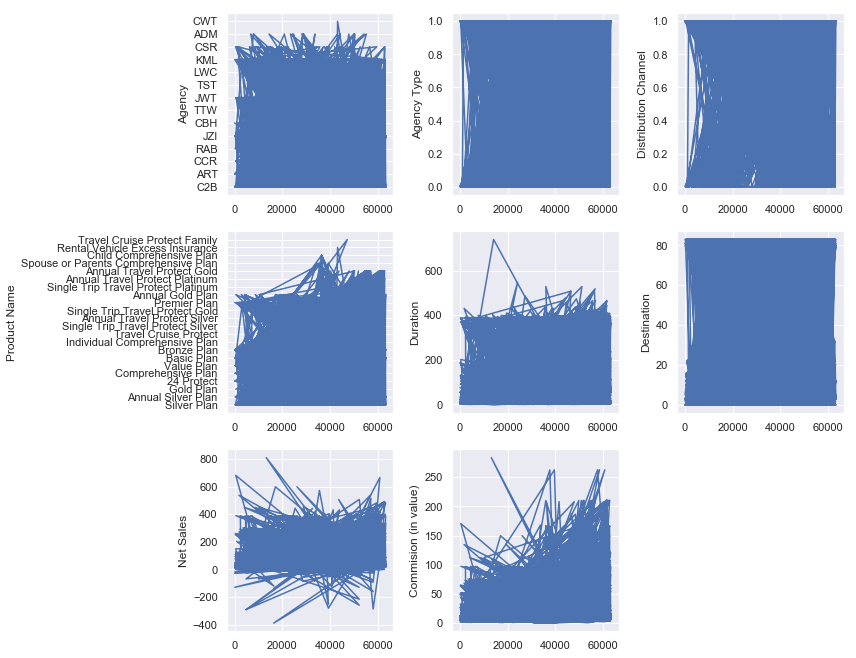

In [349]:
fig = plt.figure(figsize=(12,12))
plt.clf()
for i in range(8):
    plt.subplot(4, 3, i+1)
    plt.plot(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()

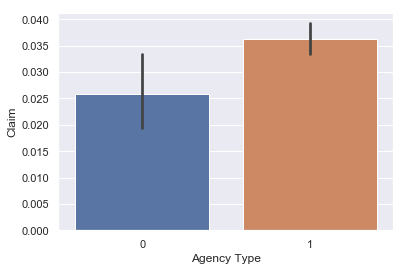

In [347]:
ax2 = sns.barplot(x="Agency Type", y="Claim", data=df)

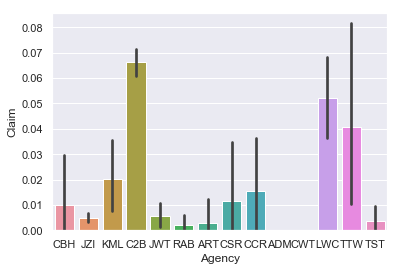

In [346]:
ax = sns.barplot(x="Agency", y="Claim", data=df)

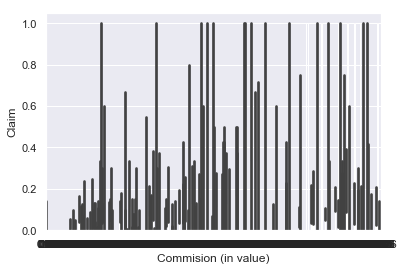

In [343]:
ax3 = sns.barplot(x="Commision (in value)", y="Claim", data=sampleData)

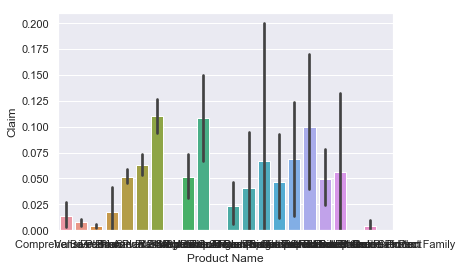

In [345]:
ax7 = sns.barplot(x="Product Name", y="Claim", data=df)

# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description


### A. Super Classs Definition

In [ ]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm
Pocket algorithm is a perceptron algorithm which keeps the best result so far in the pocket. That is, if the weights produce a smaller number of missclassifications, the weights in the pocket will be updated with the new weights. Otherwise, the weights in the pocket remain the same. At the end the value in the pocket will be returned not the last computed weights.  

The same as perceptron algorithm the pocket function computes the weights based on the below formula ($ \alpha $ is the learning rate)


$$
w^{(k+1)} = w^{(k)} + \alpha t_{i} x_{i}
$$


### Implementation of the pocket algorithm

The compare method was provided in the class workbooks and some parts of the train code. I had to make it a class and make some modifications. 
In Train method (used for training data)  set the w and w_pocket to matrix of zeros. It then iterates and updates the weights and then compare it(by calling the compare method) with the w_pocket and if w is better it updates the w_pocket. Otherwise it just continues interating. 

In Use method (used for predicting data)  the predicted values will be returned by taking the test data X.

In [381]:
#### perceptron learning
class Pocket(Classifier):
    def __init__(self):
        
        self.maxiter = 4
        self.alpha = 0.1
        self.w = None
        self.w_pocket = None

    # return 1 if w is better -1 if wp is better
    @staticmethod
    def compare(X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):

        self.w = np.zeros(X.shape[1])
        self.w_pocket = copy(self.w)

        plt.plot(T)
        N = X.shape[0]
        for i in range(self.maxiter):

            converged = True
            for k in range(N): #range(N):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    ##### additional for pocket algorithm 
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]

            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)
        print(self.w_pocket)
        #plt.plot(X@self.w_pocket)
    
    def use(self, X):
        return np.sign(X @ self.w_pocket)

### C. QDA
Discriminant Analysis applies the Bayes rule for P(T=k∣x). Meaning to find the probability of T given X and then  classify it to class with the greatest probability.

When we have a binary classification problem, k∈{−1,+1}, we have a higher posterior probability P(T=+1∣x) for the sample x with the positive label. So we have: P(T=+1∣x)>P(T=−1∣x).
we can define the discriminant function δk(x) as 
$$
\delta_k(xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

and then we can predict the label with 
$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

### Implementation of QDA

QDA class computes computes the mean, sigma and prior values by taking the X and T which is the target value. Then it computes the discriminant values in the use method and calculates the y. 
The QDA method was also provided in the class notebooks which is used to calculate the d1 and d2 (discriminant) values. 
Method Division() simply takes an X and T value and makes divides them into two parts based on the target values. 

In [375]:
class QDAClass(Classifier): 
    
    def __init__(self):
        self.mu1 = None
        self.mu2 = None

        self.Sigma1 = None
        self.Sigma2 = None


        self.prior1 = None
        self.prior2 = None
        
        self.d1 = None
        self.d2 = None
           
    def QDA(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) + np.log(prior)
    
    def division(self,X, T):
        #make divisions in data based on target 
        df = pd.DataFrame(X)
        df['Claim']= T
        
        X1= df[df.Claim == -1.0].drop(['Claim'],axis=1)
        X2= df[df.Claim == 1.0].drop(['Claim'],axis=1)

        return X1,X2
    
    def train(self,X,T):
        Xtrain=self.normalize(X)
        
        X1,X2 = self.division(Xtrain, T)
        
        
        N1= X1.shape[0]
        N2= X2.shape[0]
        N= N1+N2
        ## compute the mean and covariance
    
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)

        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)


        self.prior1 = N1 / N
        self.prior2 = N2 / N
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1= self.QDA(Xtest,np.matrix(self.mu1),self.Sigma1,self.prior1)
        self.d2= self.QDA(Xtest,np.matrix(self.mu2),self.Sigma2,self.prior2)
        
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        temp_df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        
        #np.where is a useful method to apply simple conditions to a matrix. The alternative method is vectorize which is more verbose.
        Y= np.where(temp_df['d1']> temp_df['d2'],-1,1)
        
        return Y, self.d1, self.d2
        

### D. LDA

LDA is QDA with the same covariance matrix for all the classes.
There are two main problems with QDA. 
1)Since the covariance matrixes have large dimentions (d(d+1)2 for symmetric ones), maintaining them is not cheap. 
2)The resulting class boundary has high chance of overfitting because the data is undersampled.

To overcome the aformentioned issues,we can use the same covariance for all the classes and we can reach the linear discriminant analysis model. When we remove the quadratic term in our disciriminant function we will have: 

$$
\delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

### Implementation of LDA

LDA has a very similar implementation to QDA. the only difference is that only one sigma is being computed. Method Division() simply takes an X and T value and makes divides them into two parts based on the target values. 

In [365]:
class LDAClass(Classifier): 
    
    
    def __init__(self):
        
        self.mu1 = None
        self.mu2 = None

        self.Sigma = None

        self.prior1 = None
        self.prior2 = None
        
        self.d1 = None
        self.d2 = None
   
    def LDA(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(prior), axis=1)
    
    def division(self,X, T):
#         #make divisions in data based on target 
        df = pd.DataFrame(X)
        df['Claim']= T
        
        X1= df[df.Claim == -1.0].drop(['Claim'],axis=1)
        X2= df[df.Claim == 1.0].drop(['Claim'],axis=1)

        return X1,X2

    def train(self,X,T):
        Xtrain =self.normalize(X)
        
        X1,X2 = self.division(Xtrain, T)
        
        
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))
        

        
        
        self.Sigma = np.cov(Xtrain.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.prior1 = N1 / (N1+N2)
        self.prior2 = N2 / (N1+N2)
        
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1= self.LDA(Xtest,self.mu1,self.Sigma,self.prior1)
        self.d2= self.LDA(Xtest,self.mu2,self.Sigma,self.prior2)
        
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        temp_df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        
        #np.where is a useful method to apply simple conditions to a matrix. The alternative method is vectorize which is more verbose. 
        Y= np.where(temp_df['d1']> temp_df['d2'],-1,1)
        
        return Y, self.d1, self.d2

### E. Logistic Regression

Least squres can be used to fit on the discrete target for classification. When dealing with multiple classes, it can cause masking problem that one class estimation is masked by other predictions.

A linear regression model that directly predicts P(T=k∣x), not the class label k is called Logistic Regression.

### Implementation of Logistic Regression

Softmax methods was provided in the workbooks of the class which is being used to update the weights in the train method. 

In [259]:
class LR (Classifier):
    
    def __init__(self,alpha):
        self.alpha = alpha
        self.w = None
        self.niter = 5

    # g(.) the softmax function

    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # for linear fx
    def g(self,X, w):
        return self.softmax(X @ w) 
    
    def train(self, X, T):
        N = X.shape[0]
        D = X.shape[1]
        #change if neccessary
        K = 2
        X1 = np.hstack((np.ones((N, 1)), X))
        self.w = np.random.rand(D+1, K)
        T1 = self.add_ones(T)
        for step in range(self.niter):
            # TODO: add training code here! 
            ys = self.g(X1, self.w)
            self.w += self.alpha * X1.T @ (T1 - ys)
    
    def use(self, X):
        Xtest = self.normalize(X)
        X1t = np.hstack((np.ones((Xtest.shape[0],1)), Xtest))
        y = self.g(X1t, self.w)
        return y

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

### Evaluation metrics summary

I this section I will provide a summary of evalution measurements. 
Usually the first measure to look at is the accuracy. Which is:

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

#### Confusion Matrix
In confusion matrix each row represents the predictions from model and column represents the actual classes. It is useful to trace in what category (TP, FP, TN, FN) the model is doing good or bad. 

#### Precision and Recall

Precision: The accuracy of positive predictions. We can read this as the ratio that my positive prediction is correct.
$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

Recall (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class.

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

Specificity (True Negative Rate): Considering imblance or difference in class, we consider TNR as well.

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

#### F1 Score
It is more convinient to have a single measure to rather than different measures. The harmonic mean of precision and recall is another measurement that can be used:

$$
F_1 = \frac{TP}{TP + \frac{FN+FP}{2}}
$$

#### The ROC (Receiver Operating Characteristic) Curve
The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity).


### Partitioning data

In [ ]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [ ]:
Xlst, Tlst = partition(pd.DataFrame(X), pd.DataFrame(T))

In [ ]:
Xtrain = Xlst[0].values
Ttrain = Tlst[0].values

Xtest = Xlst[1].values
Ttest = Tlst[1].values

In [ ]:
# Confustion matrix 

def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

#### Scaling the data
Before doing this my model wasn't able to predict any TP.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.fit_transform(Xtest)

In [193]:
Xtrain

array([[ 0.369493  ,  0.24528417, -0.47194059, ..., -0.44917529,
         0.96583333,  0.11818544],
       [ 0.369493  ,  0.24528417,  2.69078577, ...,  1.15845556,
         0.96583333, -0.87019377],
       [ 0.369493  ,  0.24528417, -0.55257668, ..., -0.38318591,
         0.96583333, -0.72193689],
       ...,
       [ 0.369493  ,  0.24528417, -0.47194059, ..., -0.50463875,
         0.96583333, -0.47484208],
       [ 0.369493  ,  0.24528417, -0.27483017, ..., -0.21841488,
        -1.03537533, -0.87019377],
       [ 0.369493  ,  0.24528417, -0.5973745 , ..., -0.48763536,
         0.96583333, -0.03007144]])

### Pocket algorithm

In [ ]:
pocket=Pocket()
pocket.train(Xtrain,Ttrain)

In [194]:
# Predicting on train data
y_predpt=pocket.use(Xtrain)

In [ ]:
# Predicting on test data
y_predp=pocket.use(Xtest)

#### Accuracy of train and test data

In [195]:
from sklearn.metrics import accuracy_score
print('Train Accuracy=', accuracy_score(np.array(Ttrain), y_predpt))
print('Test Accuracy=', accuracy_score(np.array(Ttest), y_predp))

Train Accuracy= 0.908625
Test Accuracy= 0.9165


#### Train and test accuracy
Surprisingly the test accuracy(0.9165) was higher than the train accuracy(0.908625) and I guess maybe the data is biased. 

In [318]:
cfm = confusion_matrix(y_predp, Ttest)
cfm

array([[1831,   62],
       [ 105,    2]])

In [319]:
TN= cfm[0][0]
FN= cfm[0][1]
FP= cfm[1][0]
TP= cfm[1][1]

In [320]:
precision=(TP/(TP+FP))
recall=TP/(TP+FN)
specificity=TN/(TN+FP)
print('precision=', precision)
print('recall=', recall)
print('specificity=', specificity)

precision= 0.018691588785046728
recall= 0.03125
specificity= 0.9457644628099173


In [321]:
from sklearn.metrics import f1_score
print('F1 score=', f1_score(np.array(Ttest), y_predp))

F1 score= 0.023391812865497075


#### Evaluation metrics
Although the overall accuracy of the model is high, the confusion matrix shows that the model is doing a better job in predicting True negatives 1831 and its worst performance is on True positives 2.
The overall F1 score is very low eventhough the accuracy is high, this might happen because data has more negative target values than positive ones. Specifity score is very high compared to others which again shows that the model is doing good for negative values. 



### Visualization

Comparing the predicted values with the actual target values.

Accuracy:  82.7424 %


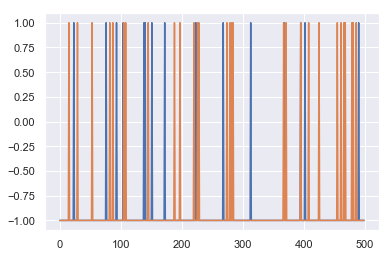

In [357]:
import matplotlib.pyplot as plt
%matplotlib inline

# retrieve labels and plot
Yl = y_predp[:500]
Tl = Ttest[:500]

plt.plot(Tl)
plt.plot(Yl)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

### QDA algorithm

In [376]:
qda = QDAClass()
qda.train(Xtrain,Ttrain)

In [377]:
# Predicting on train data
y_predQDAt, d1QDA, d2QDA= qda.use(Xtrain)

In [378]:
y_predQDAt

array([-1,  1, -1, ..., -1, -1, -1])

In [379]:
# Predicting on test data
y_predQDA, d1QDA, d2QDA= qda.use(Xtest)

#### Accuracy of train and test data

In [270]:
from sklearn.metrics import accuracy_score
print('Train Accuracy=', accuracy_score(np.array(Ttrain), y_predQDAt))
print('Test Accuracy=', accuracy_score(np.array(Ttest), y_predQDA))

Train Accuracy= 0.88975
Test Accuracy= 0.902


#### Train and test accuracy
The accuracy of QDA algorithm was less than the pocket algorithm both for the train and test data. Here also the test accuracy is higher than train data so I became more confident that the data is impalanced. 

In [361]:
cfm2 = confusion_matrix(y_predQDA, Ttest)
print(cfm2)
TN= cfm2[0][0]
FN= cfm2[0][1]
FP= cfm2[1][0]
TP= cfm2[1][1]

[[1782   42]
 [ 154   22]]


In [362]:
precision=(TP/(TP+FP))
recall=TP/(TP+FN)
specificity=TN/(TN+FP)
print('precision=', precision)
print('recall=', recall)
print('specificity=', specificity)

precision= 0.125
recall= 0.34375
specificity= 0.9204545454545454


In [363]:
from sklearn.metrics import f1_score
print('F1 score=', f1_score(np.array(Ttest), y_predp))

F1 score= 0.023391812865497075


#### Evaluation metrics
The F1 score is the same as pocket algorithm and is very low. However, the recall value is considerably higher which means that this model is doing better regarding predicting positive values.The specifity is almost similar but lower in comparision to the pocket algorithm. 

### Visualization

Accuracy:  78.2496 %


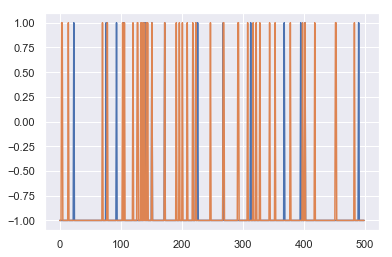

In [359]:
# retrieve labels and plot
Yl = y_predQDA[:500]
Tl = Ttest[:500]

plt.plot(Tl)
plt.plot(Yl)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

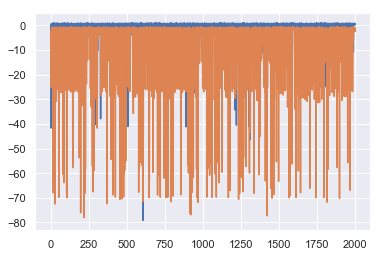

In [380]:
# Plots of d1,d2
plt.plot(d1QDA)
plt.plot(d2QDA)

Text(0.5, 0.92, 'QDA Discriminant Functions')

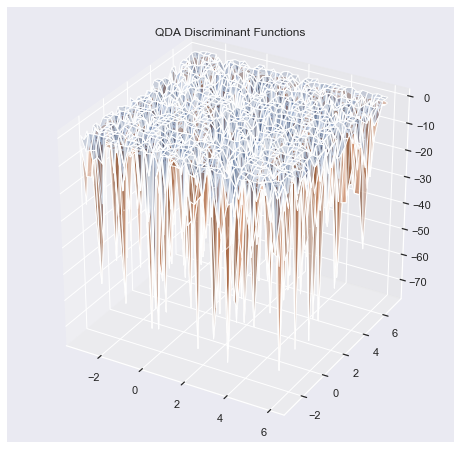

In [393]:
#from class workbook
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-3,6, 40), np.linspace(-3,7, 40))

y_predQDAplot, d1QDAplot, d2QDAplot= qda.use(Xtest[:1600])

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1QDAplot.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2QDAplot.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

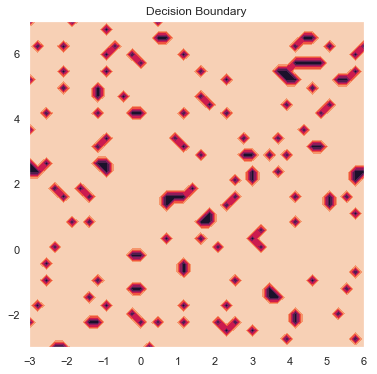

In [391]:
#from class workbook
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d1QDAplot-d2QDAplot > 0).reshape(xs.shape))
plt.title("Decision Boundary")

### LDA algorithm

In [370]:
lda = LDAClass()
lda.train(Xtrain,Ttrain)

In [371]:
# Predicting on train data
y_predLDAt, d1LDA, d2LDA= lda.use(Xtrain)

In [372]:
# Predicting on test data
y_predLDA, d1LDA, d2LDA =lda.use(Xtest)

In [373]:
from sklearn.metrics import accuracy_score
print('Train Accuracy=', accuracy_score(np.array(Ttrain), y_predLDAt))
print('Test Accuracy=', accuracy_score(np.array(Ttest), y_predLDA))

Train Accuracy= 0.964875
Test Accuracy= 0.968


#### Train and test accuracy

Train and test accuracies are almost the same and LDA has the highest accuracy so far between pocket algorithm, QDA and LDA. 

In [396]:
cfm3 = confusion_matrix(y_predLDA, Ttest)
print(cfm3)
TN= cfm3[0][0]
FN= cfm3[0][1]
FP= cfm3[1][0]
TP= cfm3[1][1]

[[1936   64]
 [   0    0]]


In [397]:
precision=(TP/(TP+FP))
recall=TP/(TP+FN)
specificity=TN/(TN+FP)
print('precision=', precision)
print('recall=', recall)
print('specificity=', specificity)

precision= nan
recall= 0.0
specificity= 1.0


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


In [398]:
from sklearn.metrics import f1_score
print('F1 score=', f1_score(np.array(Ttest), y_predLDA))

F1 score= 0.0


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Evaluation metrics
Although the accuracyy was high the model is not able to predict positive values at all (precision is nan and specificity is 1). There is a clear segragation in the plots as will which are presented in the next section. F1 score is also 0.

### Visualization

Accuracy:  93.6 %


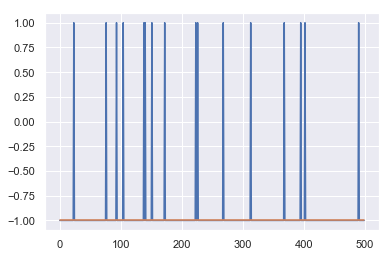

In [360]:
# retrieve labels and plot
Yl = y_predLDA[:500]
Tl = Ttest[:500]

plt.plot(Tl)
plt.plot(Yl)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

It is clear that the model is only predicting -1. 

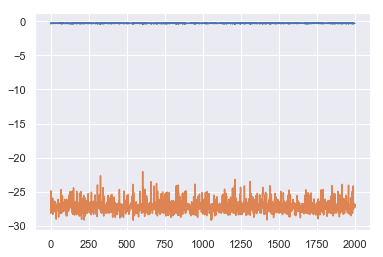

In [374]:
# Plots of d1,d2
plt.plot(d1LDA)
plt.plot(d2LDA)

Text(0.5, 0.92, 'LDA Discriminant Functions')

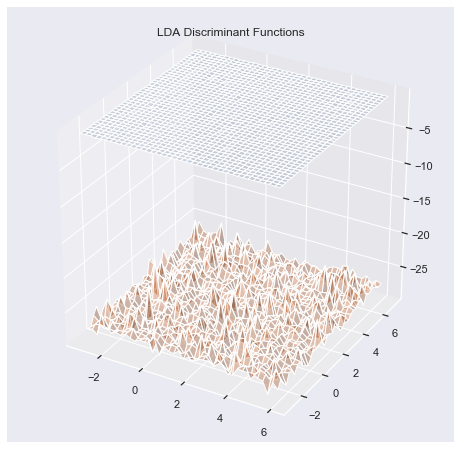

In [394]:
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-3,6, 40), np.linspace(-3,7, 40))

y_predLDAplot, d1LDAplot, d2LDAplot= lda.use(Xtest[:1600])

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1LDAplot.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2LDAplot.reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

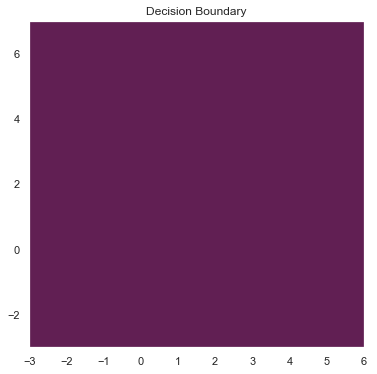

In [395]:
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d1LDAplot-d2LDAplot > 0).reshape(xs.shape))
plt.title("Decision Boundary")

### Logistic Regeression

In [438]:
aplpha = 0.1
lr = LR(aplpha)
lr.train(Xtrain[:],Ttrain[:])

In [439]:
# Predicting on train data
y_predLRt= lda.use(Xtrain)

In [440]:
# Predicting on test data
y_predLR = lr.use(Xtest[:])

In [441]:
y_predLR

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [442]:
aplpha = 0.0001
lr = LR(aplpha)
lr.train(Xtrain[:],Ttrain[:])

In [447]:
# Predicting on train data
y_predLRt= lda.use(Xtrain)

In [444]:
# Predicting on test data
y_predLR = lr.use(Xtest[:])

In [445]:
y_predLR

array([[0.99623784, 0.00376216],
       [0.99104429, 0.00895571],
       [0.99613976, 0.00386024],
       ...,
       [0.99657416, 0.00342584],
       [0.99285107, 0.00714893],
       [0.99331872, 0.00668128]])

Based on the above experiments on alpha value, logistic regeression is not performing well with high learning rates on this dataset. 

Since the logistic regression returns the probability and not actual values I didn't make a confusion matrix because in that case I needed to convert probabilities to actual values which I think undermine the benefit of having logistic regression over linear regression in classification.

Accuracy:  0.0 %


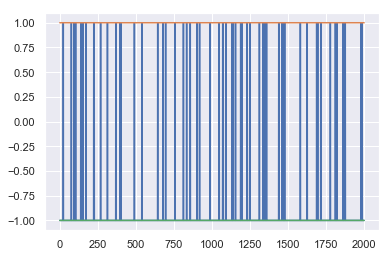

In [433]:
# retrieve labels and plot
Yl = y_predLR
Tl = Ttest

plt.plot(Tl)
plt.plot(Yl)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

### Model comparison 
Overall QDA had the best performance in prediciting the positive labels which apparently was the bigest difficulty of all the models. LDA did the worst among all.

# Conclusions

By far this was the most difficult assignment because of the different challenges in algorithms. I found QDA and LDA the most difficult ones because they were very similar in terms of implementation. I think I am more comfortable with understanding the confusion matrix and precision, recall metrics. I also I am getting better in infering information from the plots. 

I spent a lot of time on LDA because I wasn't expecting to see a very low perforance, for example F1 of 0. 

# References

zahier nasrudin. (2019). Available from Kaggle Web site: https://www.kaggle.com/mhdzahier/travel-insurance/home
Class notebooks.

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 
Again, this is a **writing assignment**. Please don't forget to properly explain your codes and results using Markdown cell. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)